<a href="https://colab.research.google.com/github/RPeleja/FAI24_G01/blob/main/Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group** Rui Peleja - 30785 | Rui Vieira - 33463


**Context**: Dataset its about DataAnalystJobs by kaggle

**Goal**: Explore company ratings and their relationship with other factors like sector, salary and location.

###Load Dataset

In [ ]:
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("andresionek/data-jobs-listings-glassdoor")
# print("Path to dataset files:", path)


Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Add this import for DecisionTree
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Add this import for K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/FA/')

#from Project02.Utils import load_dataframe_from_csv
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
# Change Root directory
%cd /content/drive/MyDrive/Colab Notebooks/FA/Project02

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content/drive/MyDrive/Colab Notebooks/FA/Project02


In [ ]:
# Dataset File Path
filePath = "DataSet/DataAnalyst.csv"

df = pd.read_csv(filePath)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Exploratory Data Analysis (EDA)

### Load and Check Data

In [ ]:
print("Nr. rows - Jobs: ", len(df))

Nr. rows - Jobs:  2253


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Variable description

**Variable Description**
* Unnamed: 0: index
* Job Title: Job title name
* Salary Estimate: gender of passenger
* Job Description: age of passenger
* Rating: Rating
* Company Name: Company name
* Location: Company location
* Size: Number os employees
* Industry: Job Industry
* Sector: Job Sector

In [ ]:
# Print top 5 by default
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Social Assistance,Non-Profit
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Health Care Services & Hospitals,Health Care
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Internet,Information Technology
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,IT Services,Information Technology
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Sports & Recreation,"Arts, Entertainment & Recreation"


In [ ]:
# Display basic information about the DataFrame
print(df.info())

# Display descriptive statistics for numerical features
print(df.describe())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2253 non-null   int64  
 1   Job Title        2253 non-null   object 
 2   Salary Estimate  2253 non-null   object 
 3   Job Description  2253 non-null   object 
 4   Rating           2253 non-null   float64
 5   Company Name     2252 non-null   object 
 6   Location         2253 non-null   object 
 7   Size             2253 non-null   object 
 8   Industry         2253 non-null   object 
 9   Sector           2253 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 176.1+ KB
None
       Unnamed: 0       Rating
count   2253.0000  2253.000000
mean    1126.0000     3.160630
std      650.5294     1.665228
min        0.0000    -1.000000
25%      563.0000     3.100000
50%     1126.0000     3.600000
75%     1689.0000     4.000000
max     2252.0000     5.

### Univariate Variable Analysis - Categorical Variables

In [ ]:
# Get the categorical variables from df
categorical_features = [feature for feature in df.columns if df[feature].dtype == object]
print(categorical_features)

['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Size', 'Industry', 'Sector']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


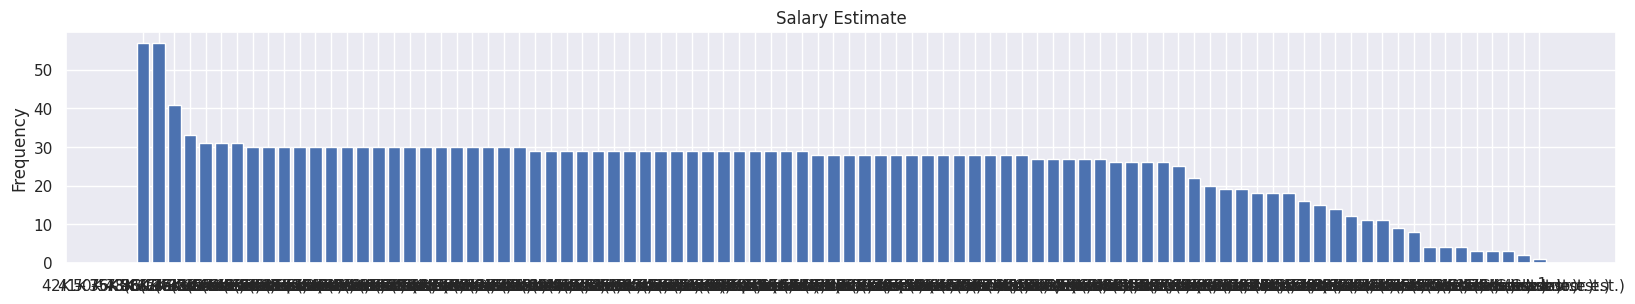

Salary Estimate: 
 Salary Estimate
$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$47K-$81K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: count, Length: 90, dtype: int64


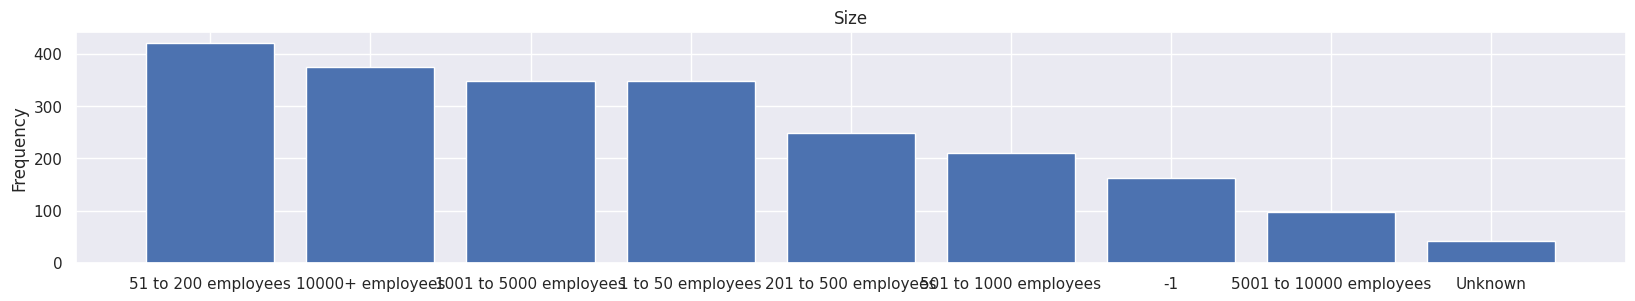

Size: 
 Size
51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: count, dtype: int64


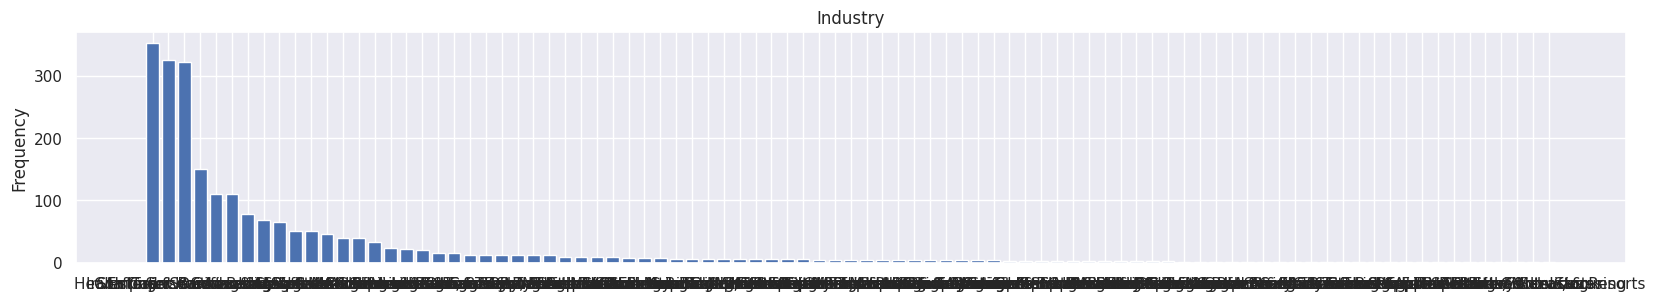

Industry: 
 Industry
-1                                  353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Computer Hardware & Software        111
                                   ... 
Express Delivery Services             1
Truck Rental & Leasing                1
Sporting Goods Stores                 1
Chemical Manufacturing                1
Hotels, Motels, & Resorts             1
Name: count, Length: 89, dtype: int64


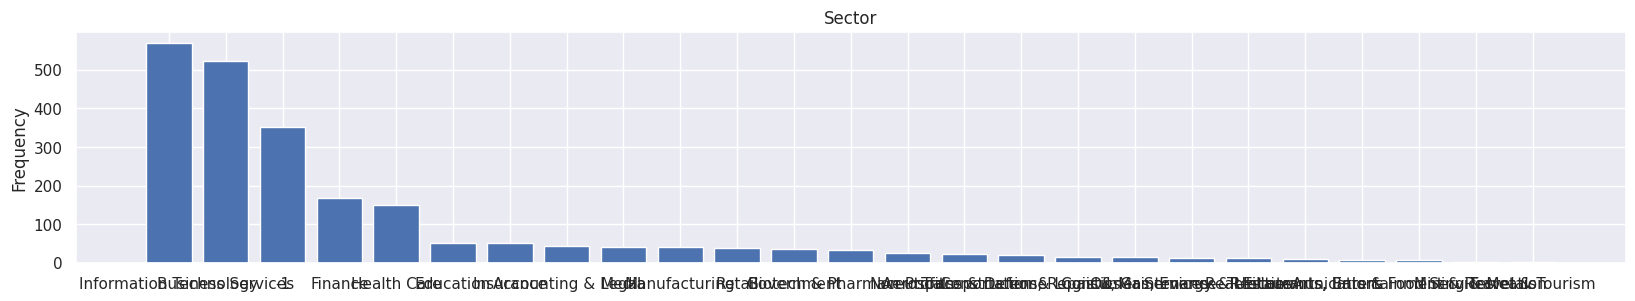

Sector: 
 Sector
Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Mining & Metals  

In [ ]:
def bar_plot(variable):
  # get feature
  var = df[variable]
  # count number of categorical variable(value/sample)
  varValue = var.value_counts()    # visualize
  plt.figure(figsize = (20,3))
  plt.bar(varValue.index, varValue)
  plt.xticks(varValue.index, varValue.index.values)
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show()
  print("{}: \n {}".format(variable,varValue))# Plot categorial_features with less than 10 distinct values

for cf in categorical_features:
  if df[cf].nunique() < 100:
    bar_plot(cf)

### Univariate Variable Analysis - Numerical variables

['Unnamed: 0', 'Rating']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


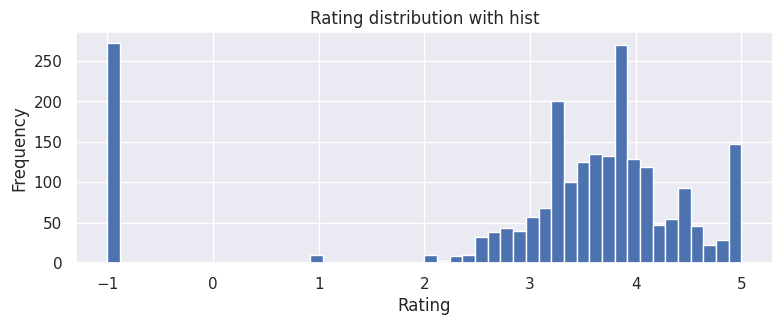

In [ ]:
# Visualize frequency and distribution of numerical features
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

# Get the numerical variables from train_df
numerical_features = [feature for feature in df.columns if df[feature].dtype != object]
print(numerical_features)

removed_nf = ["Unnamed: 0"]
for nf in numerical_features:
  if nf not in removed_nf:
    plot_hist(nf)

### Find missing values

In [ ]:
# find Rating null values
print(f'Rating has {df["Rating"].isnull().sum()} null values and {(df["Rating"] == -1).sum()} -1 values')  # Corrected line
df[df["Rating"] == -1].head()

Rating has 0 null values and 272 -1 values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector
11,11,Data Analyst,$37K-$66K (Glassdoor est.),BulbHead is currently seeking a Data Analyst t...,-1.0,BulbHead,"Fairfield, NJ",1 to 50 employees,-1,-1
21,21,Data Science Analyst,$37K-$66K (Glassdoor est.),"Job Description\nOur client, a music streaming...",-1.0,MUSIC & Entertainment,"New York, NY",Unknown,-1,-1
34,34,Data Analyst (Games),$46K-$87K (Glassdoor est.),Carry1st is the leading mobile game publisher ...,-1.0,Carry1st,"New York, NY",-1,-1,-1
36,36,Data Business Analyst,$46K-$87K (Glassdoor est.),"At Clear Street, we are disrupting the institu...",-1.0,Clear Street,"New York, NY",51 to 200 employees,-1,-1
40,40,"Business Analyst, Data Platforms",$46K-$87K (Glassdoor est.),Company Description\n\nPinto is building the w...,-1.0,Pinto,"New York, NY",1 to 50 employees,-1,-1


### Data preparation

Transform Data

In [ ]:
# Remove the 'Competitors' column
df = df.drop(columns=['Competitors'])

# # Remove the 'Founded' column
df = df.drop(columns=['Founded'])

# # Remove the 'Type of ownership' column
df = df.drop(columns=['Type of ownership'])

# Remove the 'Headquarters' column
df = df.drop(columns=['Headquarters'])

# Remove the 'Revenue' column
df = df.drop(columns=['Revenue'])

# Remove the 'Easy Apply' column
df = df.drop(columns=['Easy Apply'])

In [ ]:
# Grouping Sector Values

def group_sectors(sector):
    if sector in ["Information Technology", "Business Services", "Finance", "Health Care",
                   "Education", "Manufacturing", "Retail", "Government"]:
        return sector
    else:
        return "Other Industries"

df['Sectors'] = df['Sector'].apply(group_sectors)

# Remove the 'Competitors' column
df = df.drop(columns=['Sector'])

# Grouping Industries Values

def group_industry(industry):
    if industry in ["IT Services", "Staffing & Outsourcing", "Health Care Services & Hospitals",
                    "Investment Banking & Asset Management", "Computer Hardware & Software", "Consulting"]:
        return industry
    else:
        return "Other Industries"

df['Industries'] = df['Industry'].apply(group_industry)

# Remove the 'Competitors' column
df = df.drop(columns=['Industry'])

# Replace -1 with NaN for object type columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].replace('-1', np.nan)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Replace '-1' and 'Unknown' with NaN
df['Size'] = df['Size'].replace(['-1', 'Unknown'], np.nan)

# Rename multiple columns
df = df.rename(columns={
    'Unnamed: 0': 'Id'
})

# Remove unnecessary characters and split the salary ranges
def extract_salary_range(salary):
    if pd.isnull(salary):
        return np.nan, np.nan  # Handle missing values

    # Remove unwanted characters
    salary = salary.replace('(Glassdoor est.)', '').replace('$', '').replace('K', '').strip()

    # Split into min and max salary
    salary_split = salary.split('-')

    # Convert to numeric and multiply by 1000 (as it's represented in 'K')
    try:
        min_salary = int(salary_split[0].strip()) * 1000
        max_salary = int(salary_split[1].strip()) * 1000
    except (IndexError, ValueError):
        return np.nan, np.nan  # Handle unexpected formats

    return min_salary, max_salary

# Apply the function to create new columns
df['Min Salary'], df['Max Salary'] = zip(*df['Salary Estimate'].apply(extract_salary_range))

# Calculate the average salary
df['Average Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

# Calculate the median of 'Average Salary', 'Min Salary', and 'Max Salary' (excluding NaN values)
median_avg_salary = df['Average Salary'].median()
median_min_salary = df['Min Salary'].median()
median_max_salary = df['Max Salary'].median()

# Update missing values using .fillna() - Modified to avoid warnings
df['Average Salary'] = df['Average Salary'].fillna(median_avg_salary)
df['Min Salary'] = df['Min Salary'].fillna(median_min_salary)
df['Max Salary'] = df['Max Salary'].fillna(median_max_salary)

# Remove the 'Salary Estimate' column
df = df.drop(columns=['Salary Estimate'])

# Calculate the mean of 'Rating' excluding -1 values
mean_rating = df[df['Rating'] != -1]['Rating'].mean()

 # Replace -1 with the mean
df['Rating'] = df['Rating'].replace(-1, mean_rating)

# Define categories for ratings
def categorize_rating(rating):
    if rating < 2.5:
        return 'Low'
    elif rating < 4.0:
        return 'Medium'
    else:
        return 'High'

# Apply categorization
df['Rating Category'] = df['Rating'].apply(categorize_rating)

# To display the top 5 rows
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,Job Title,Job Description,Rating,Company Name,Location,Size,Sectors,Industries,Min Salary,Max Salary,Average Salary,Rating Category
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Other Industries,Other Industries,37000.0,66000.0,51500.0,Medium
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Health Care,Health Care Services & Hospitals,37000.0,66000.0,51500.0,Medium
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Information Technology,Other Industries,37000.0,66000.0,51500.0,Medium
3,3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,Information Technology,IT Services,37000.0,66000.0,51500.0,High
4,4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Other Industries,Other Industries,37000.0,66000.0,51500.0,Medium


In [ ]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2253 non-null   int64  
 1   Job Title        2253 non-null   object 
 2   Job Description  2253 non-null   object 
 3   Rating           2253 non-null   float64
 4   Company Name     2252 non-null   object 
 5   Location         2253 non-null   object 
 6   Size             2048 non-null   object 
 7   Sectors          2253 non-null   object 
 8   Industries       2253 non-null   object 
 9   Min Salary       2253 non-null   float64
 10  Max Salary       2253 non-null   float64
 11  Average Salary   2253 non-null   float64
 12  Rating Category  2253 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 228.9+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check for missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Id,0
Job Title,0
Job Description,0
Rating,0
Company Name,1
Location,0
Size,205
Sectors,0
Industries,0
Min Salary,0


In [ ]:
# Display basic statistics
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,Rating,Min Salary,Max Salary,Average Salary
count,2253.0000,2253.000000,2253.000000,2253.000000,2253.000000
mean,1126.0000,3.731903,54264.980027,89977.807368,72121.615624
std,650.5294,0.628548,19571.234452,29309.163044,23595.585030
min,0.0000,1.000000,24000.000000,38000.000000,33500.000000
25%,563.0000,3.400000,41000.000000,70000.000000,58000.000000
50%,1126.0000,3.731903,50000.000000,87000.000000,69000.000000
75%,1689.0000,4.000000,64000.000000,104000.000000,80500.000000
max,2252.0000,5.000000,113000.000000,190000.000000,150000.000000


### Basic Data Analysis

In [ ]:
# Unique job titles
print("Top 10 Data Analyst Job Titles")
print(df['Job Title'].value_counts().head(10))

# Top job locations
print("Top 10 Locations Jobs")
print(df['Location'].value_counts().head(10))

# Salary by Industry and Sector
industry_salaries = df.groupby('Industries')['Average Salary'].mean().sort_values(ascending=False)
sector_salaries = df.groupby('Sectors')['Average Salary'].mean().sort_values(ascending=False)


Top 10 Data Analyst Job Titles
Job Title
Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Analyst Junior         17
Data Analyst II             17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Name: count, dtype: int64
Top 10 Locations Jobs
Location
New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
Charlotte, NC         78
Houston, TX           72
Dallas, TX            66
San Diego, CA         62
Philadelphia, PA      56
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


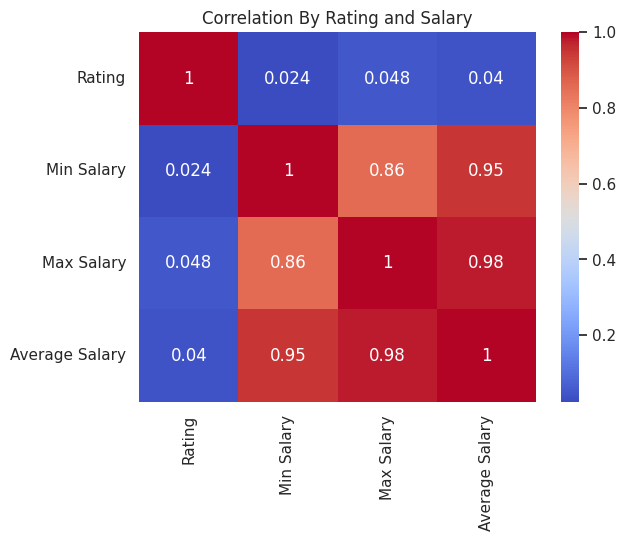

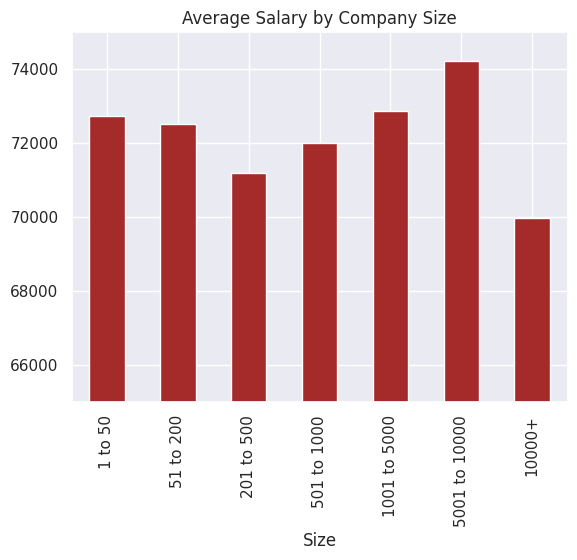

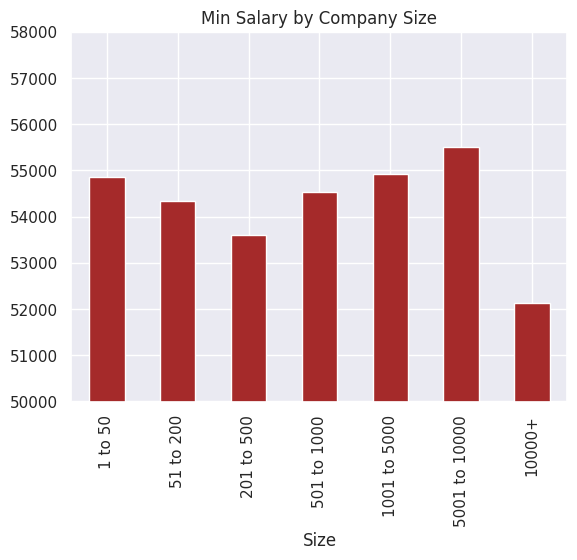

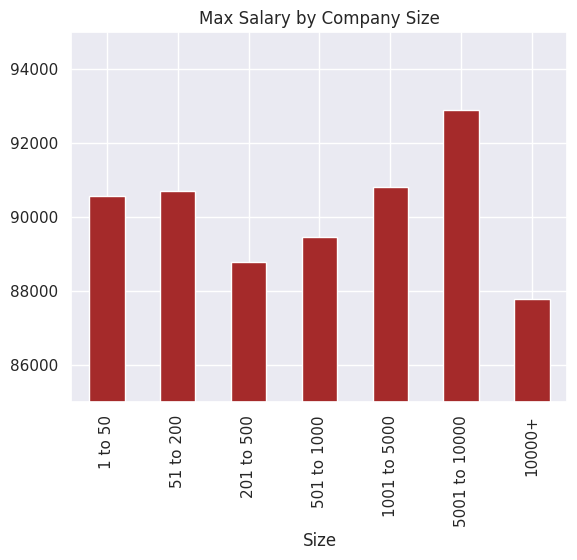

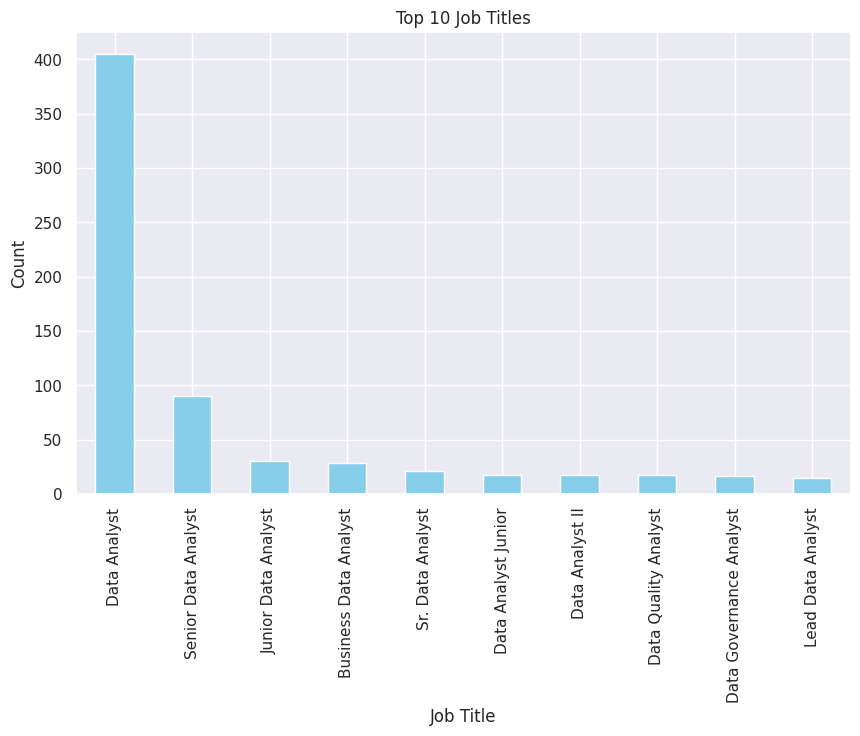

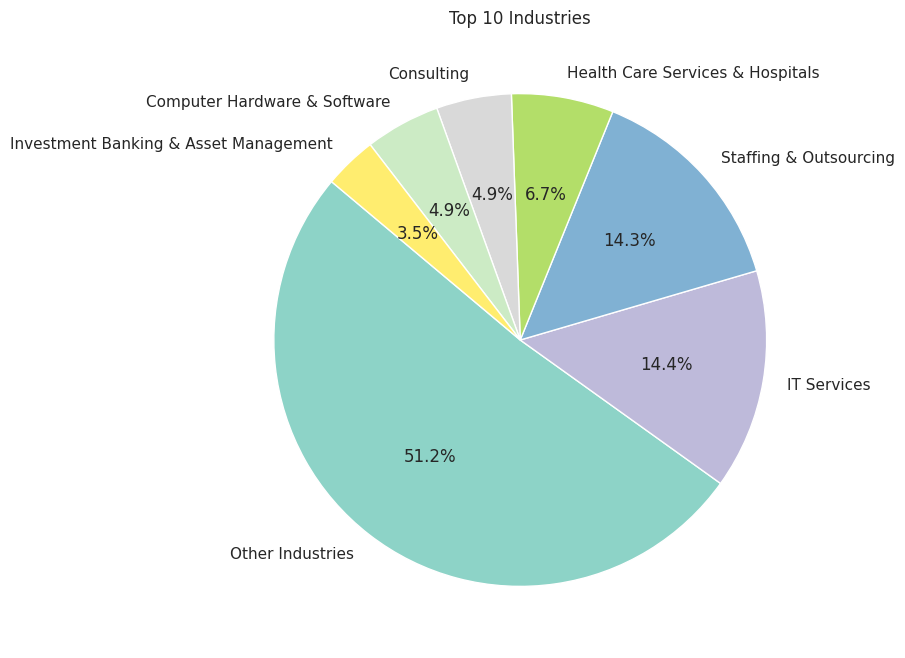

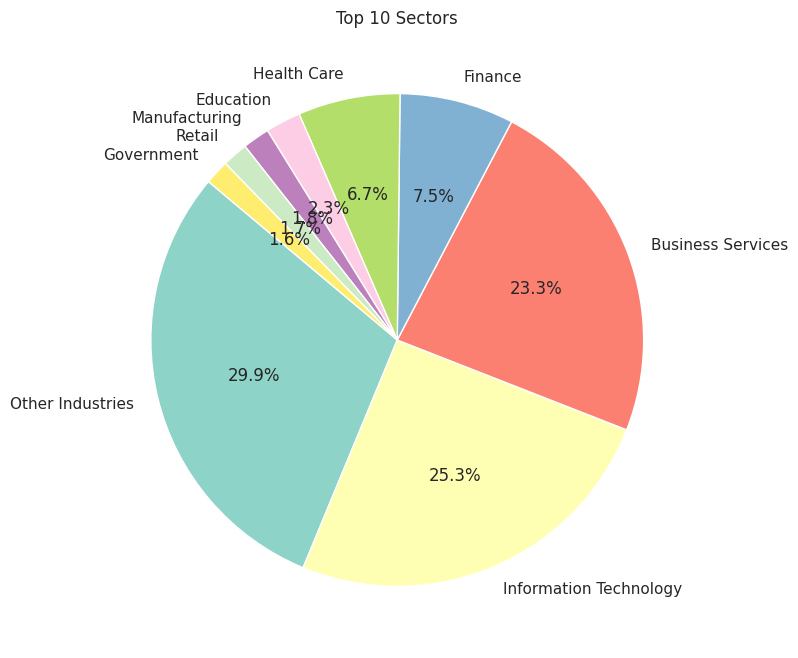

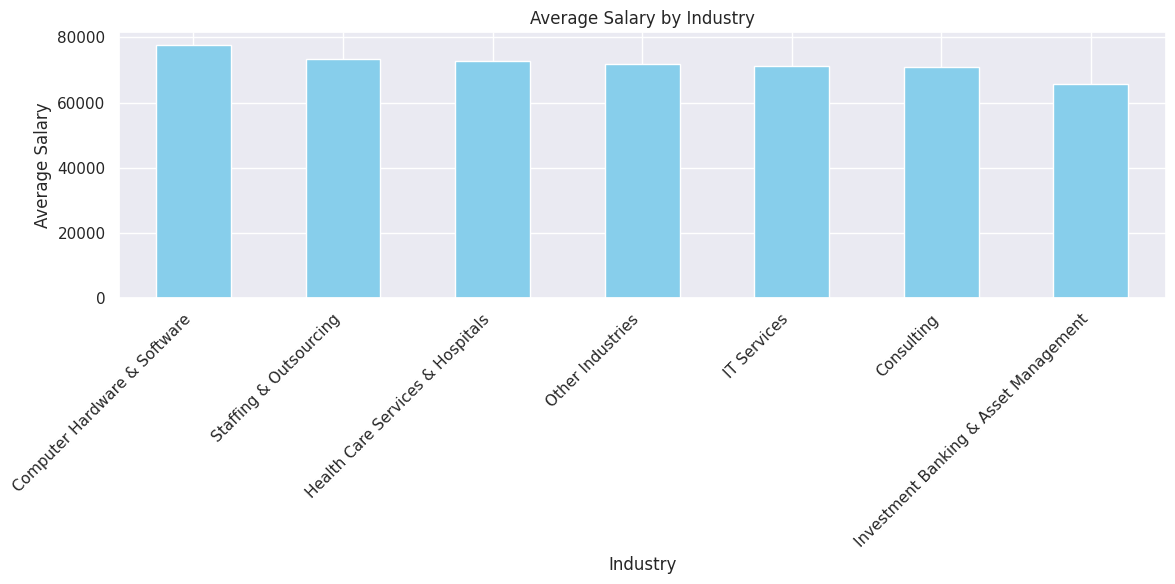

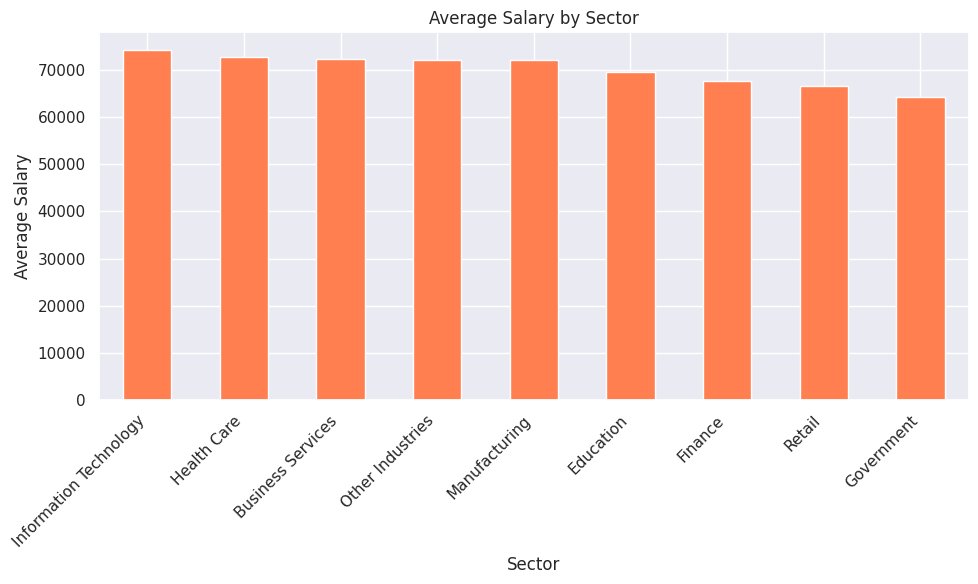

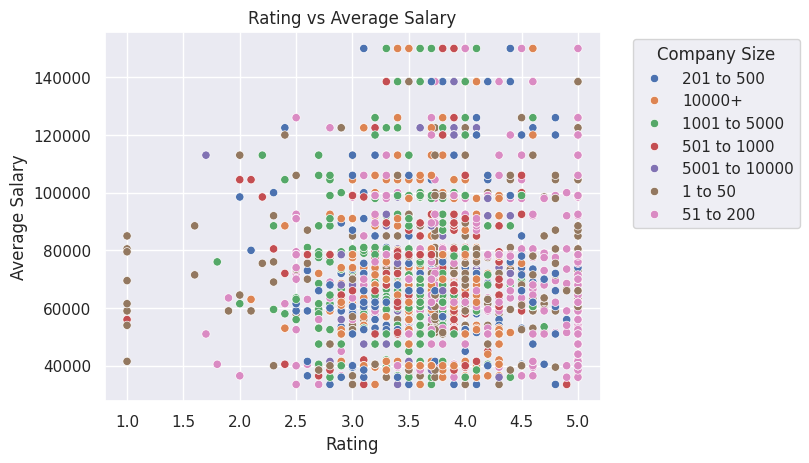

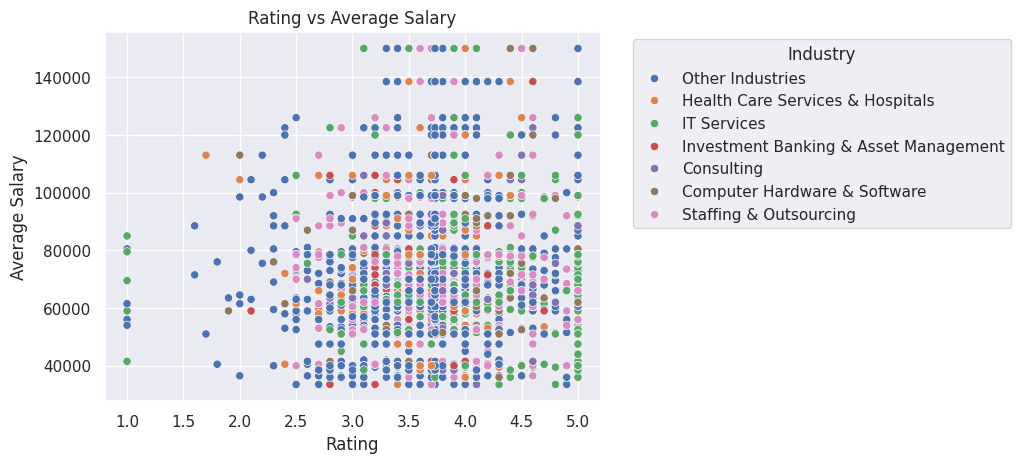

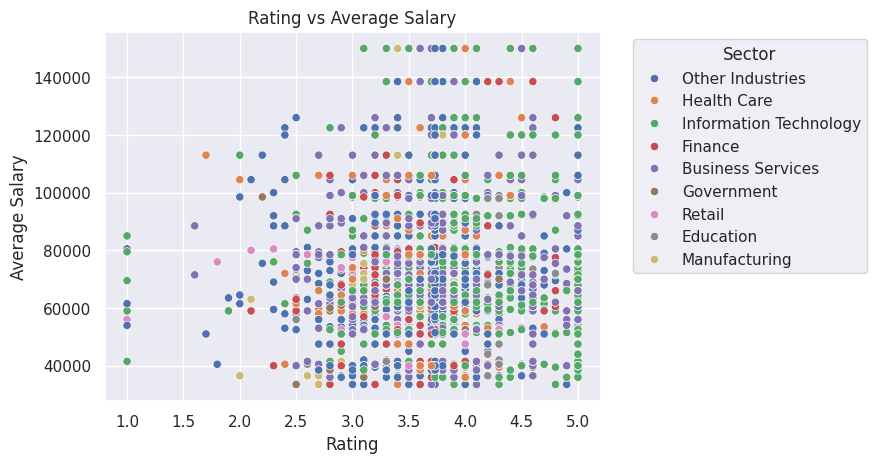

In [ ]:
# Correlation
corr = df[['Rating', 'Min Salary', 'Max Salary', 'Average Salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation By Rating and Salary')
plt.show()

# Group Comparisons
# Define size order and modified size order
size_order = ["1 to 50 employees", "51 to 200 employees", "201 to 500 employees", "501 to 1000 employees", "1001 to 5000 employees", "5001 to 10000 employees", "10000+ employees"]
size_order_modified = [size.replace(" employees", "") for size in size_order]

# Create a mapping dictionary
size_mapping = dict(zip(size_order, size_order_modified))

# Replace the values in the 'Size' column
df['Size'] = df['Size'].map(size_mapping)

# Average Salary
avg_salary_by_size = df.groupby('Size', observed=False)['Average Salary'].mean().sort_values(ascending=True)
avg_salary_by_size = avg_salary_by_size.reindex(size_order_modified)

avg_salary_by_size.plot(kind='bar', color='brown')
plt.title('Average Salary by Company Size')
plt.ylim(65000, 75000)
plt.show()

# Min Salary
min_salary_by_size = df.groupby('Size', observed=False)['Min Salary'].mean().sort_values(ascending=True)  # Corrected to 'Min Salary'
min_salary_by_size = min_salary_by_size.reindex(size_order_modified)  # Use reindex here as well

min_salary_by_size.plot(kind='bar', color='brown')
plt.title('Min Salary by Company Size')
plt.ylim(50000, 58000)
plt.show()

# Max Salary
max_salary_by_size = df.groupby('Size', observed=False)['Max Salary'].mean().sort_values(ascending=True)
max_salary_by_size = max_salary_by_size.reindex(size_order_modified)  # Use reindex here as well

max_salary_by_size.plot(kind='bar', color='brown')
plt.title('Max Salary by Company Size')
plt.ylim(85000, 95000)
plt.show()


# Top 10 job titles
plt.figure(figsize=(10, 6))
df['Job Title'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

# Top 10 Industries
industry_counts = df['Industries'].value_counts().head(10)
plt.figure(figsize=(10, 8))
industry_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Top 10 Industries')
plt.ylabel('')  # Hide the y-label
plt.show()

# Top 10 Sectors
industry_counts = df['Sectors'].value_counts().head(10)
plt.figure(figsize=(10, 8))
industry_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Top 10 Sectors')
plt.ylabel('')  # Hide the y-label
plt.show()

# Salary by Industry and Sector
industry_salaries = df.groupby('Industries')['Average Salary'].mean().sort_values(ascending=False)
sector_salaries = df.groupby('Sectors')['Average Salary'].mean().sort_values(ascending=False)

# Bar plot for industry salaries
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
industry_salaries.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Bar plot for sector salaries
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sector_salaries.plot(kind='bar', color='coral')
plt.title('Average Salary by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Scatter plot for Rating vs Average Salary
sns.scatterplot(data=df, x='Rating', y='Average Salary', hue='Size')
plt.title('Rating vs Average Salary')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot for Rating vs Average Salary
sns.scatterplot(data=df, x='Rating', y='Average Salary', hue='Industries')
plt.title('Rating vs Average Salary')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot for Rating vs Average Salary
sns.scatterplot(data=df, x='Rating', y='Average Salary', hue='Sectors')
plt.title('Rating vs Average Salary')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


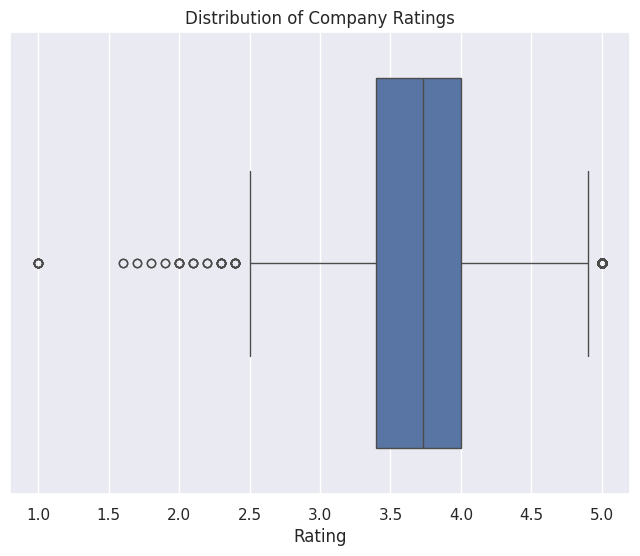

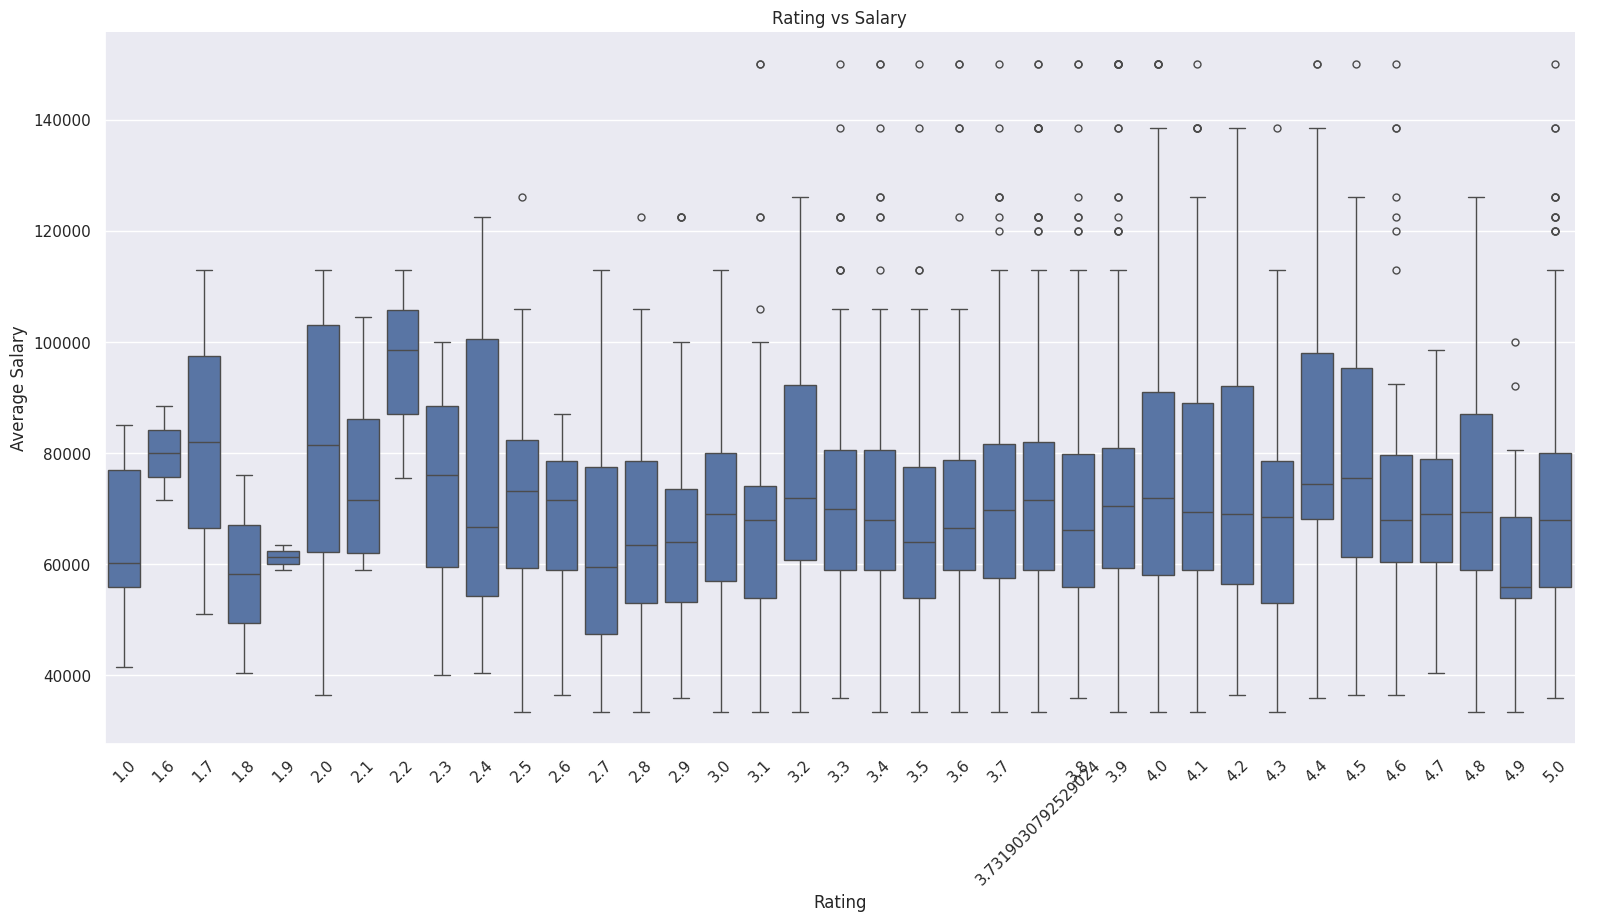

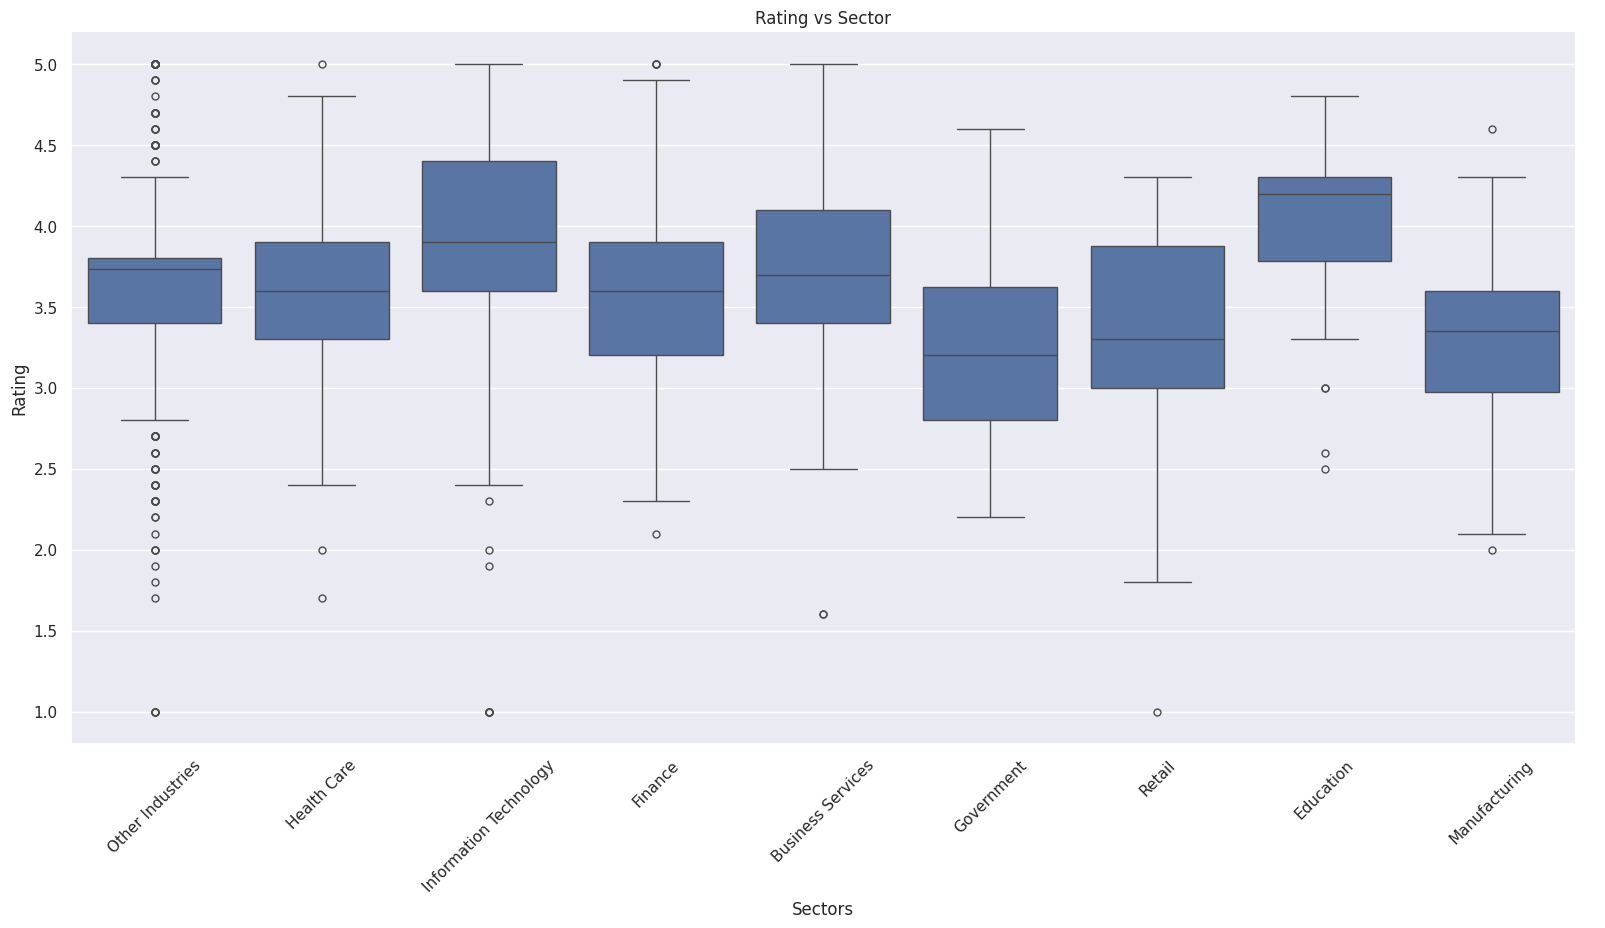

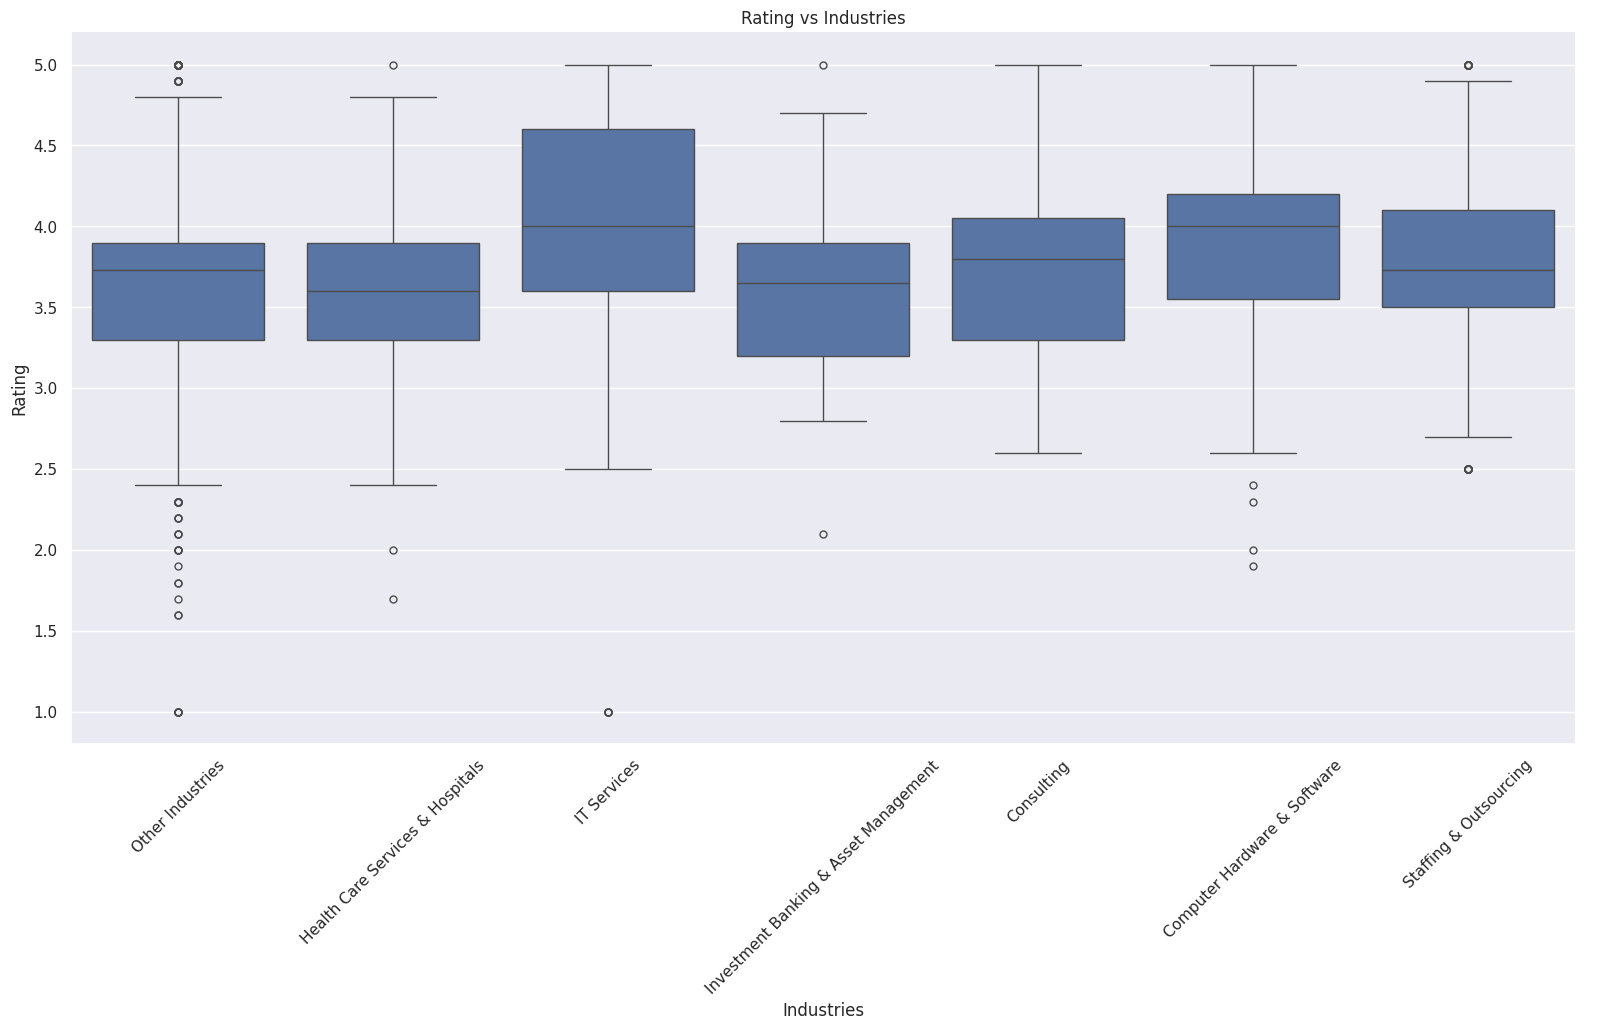

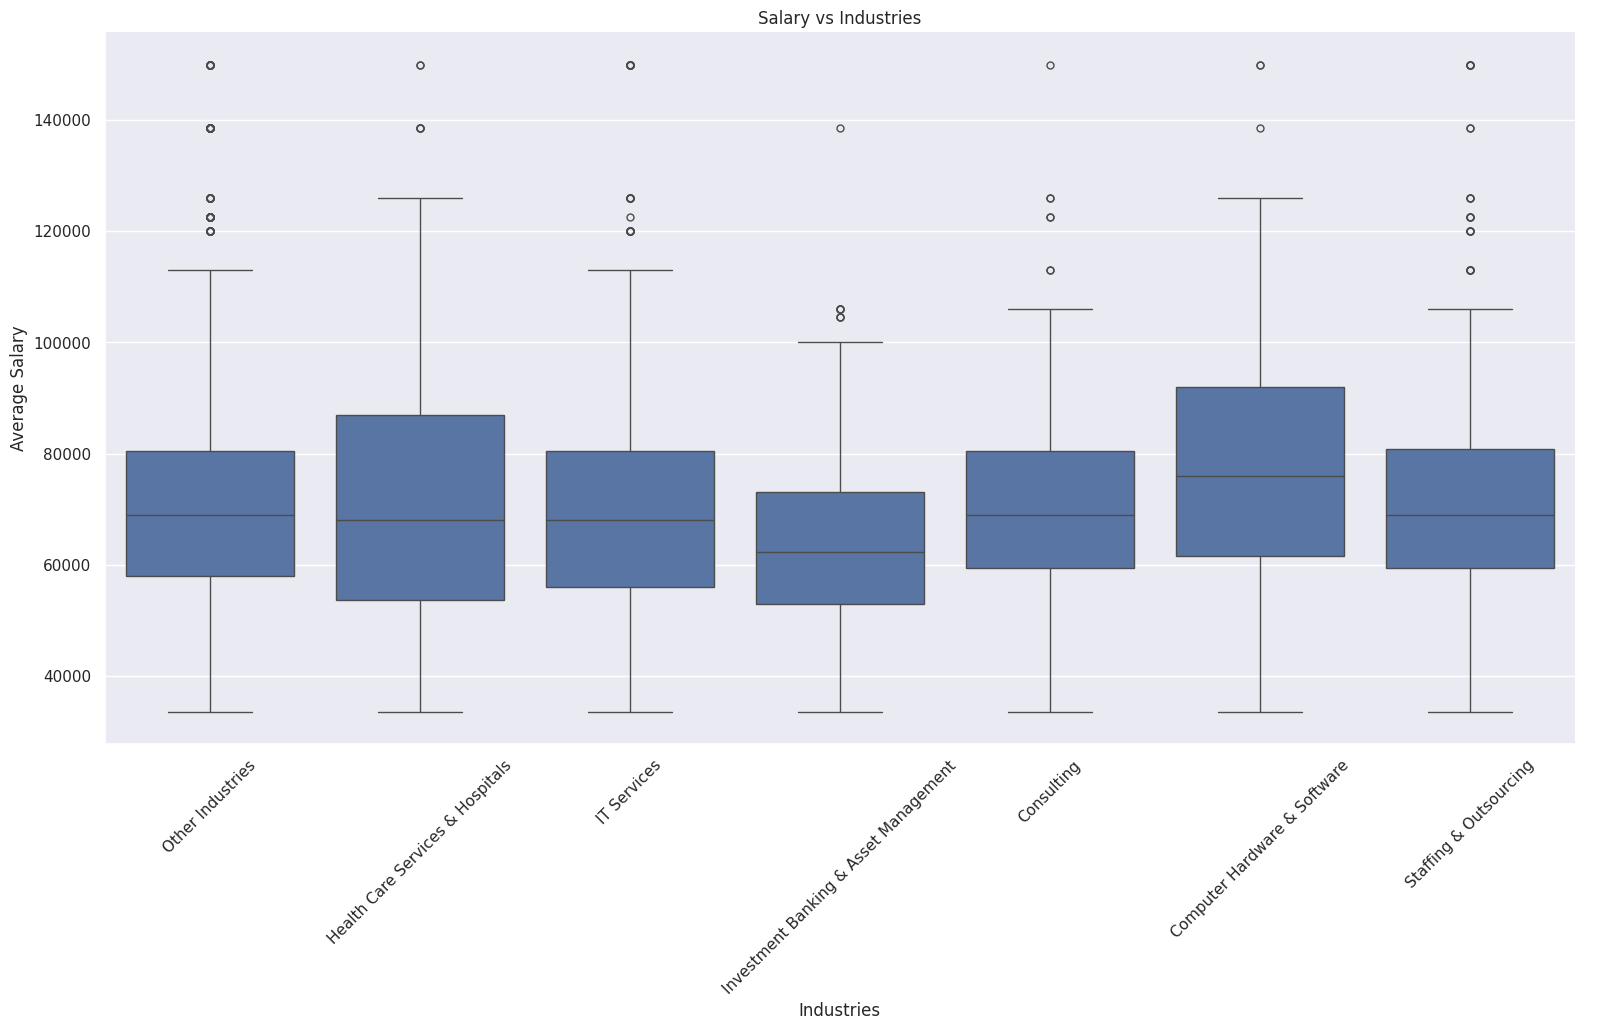

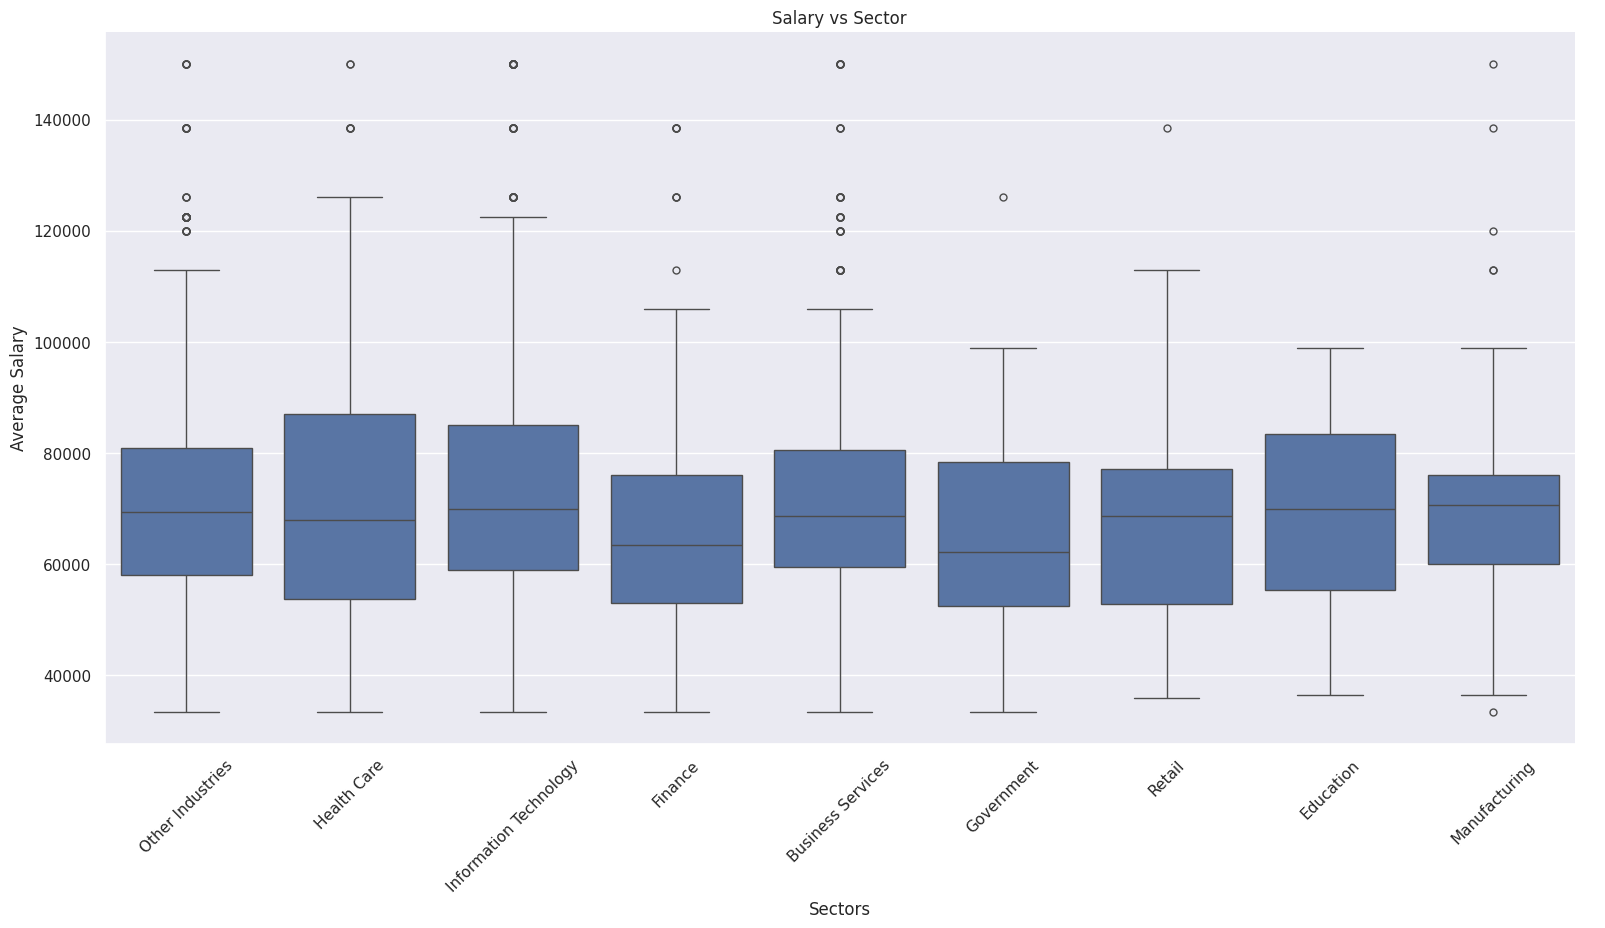

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'])
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating')
plt.show()

# Salary vs Rating
sns.catplot(x = "Rating", y = "Average Salary", data = df, kind = "box", height=8, aspect=2)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Rating vs Salary')
# Show
plt.show()

# Rating vs Sector
sns.catplot(x = "Sectors", y = "Rating", data = df, kind = "box", height=8, aspect=2)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Rating vs Sector')
# Show
plt.show()

# Rating vs Sector
sns.catplot(x = "Industries", y = "Rating", data = df, kind = "box", height=8, aspect=2)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Rating vs Industries')
# Show
plt.show()

# Salary vs Industries
sns.catplot(x = "Industries", y = "Average Salary", data = df, kind = "box", height=8, aspect=2)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Salary vs Industries')
# Show
plt.show()

# Salary vs Sector
sns.catplot(x = "Sectors", y = "Average Salary", data = df, kind = "box", height=8, aspect=2)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Salary vs Sector')
# Show
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


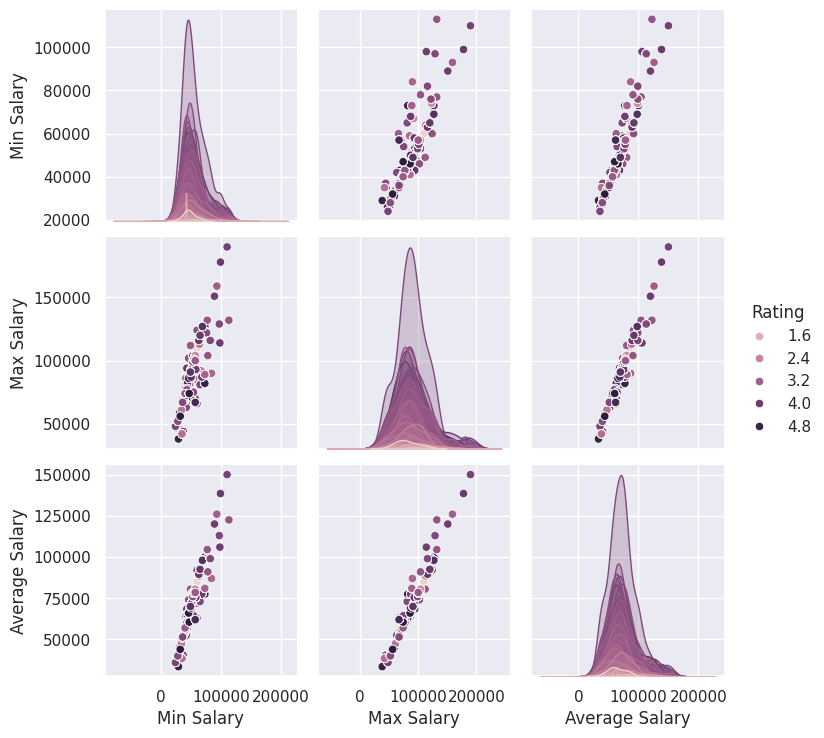

In [ ]:
sns.pairplot(df.drop(columns=['Id']), hue='Rating')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Models - Supervised & Unsupervised

##Supervised Learning - Hold-out Method




1.   Decision Tree
2.   Random Forest


*   Predict the "Rating Category" of companies.

Based on specific features from the dataset, such as company size, sector, location, and salary-related attributes (Average Salary, Min Salary, and Max Salary)

Example Analysis:
*   **Objective**: Understand the factors that influence the rating of a company. Ratings are typically a measure of the company's reputation, employee satisfaction, or market standing..
*   **Models**: Decision Tree and Random Forest classifiers to model the relationship between the input features and the target variable.

Preprocess

In [ ]:
# Select relevant columns
df_model = df[['Size', 'Sectors', 'Location', 'Average Salary', 'Max Salary', 'Min Salary']]

# Handle missing values
df_model = df_model.dropna()  # Drop rows with missing values
df_model.fillna("Unknown", inplace=True)

imputer = SimpleImputer(strategy='mean')
df[['Min Salary', 'Max Salary']] = imputer.fit_transform(df[['Min Salary', 'Max Salary']])

# Encode categorical features
df_model = pd.get_dummies(df_model, drop_first=True)

# Separate features (X) and target variable (y)
X = df[['Size', 'Sectors', 'Location', 'Average Salary', 'Max Salary', 'Min Salary']]  # Features
X = pd.get_dummies(X, drop_first=True)  # Encode categorical features
y = df['Rating Category']  # Target variable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Split the Data (Hold-out Method) - Divide the dataset into training and testing sets

In [ ]:
#  the dataset into training and testing sets (80% training, 2Split0% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Model building - DecisionTree


In [ ]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=5, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


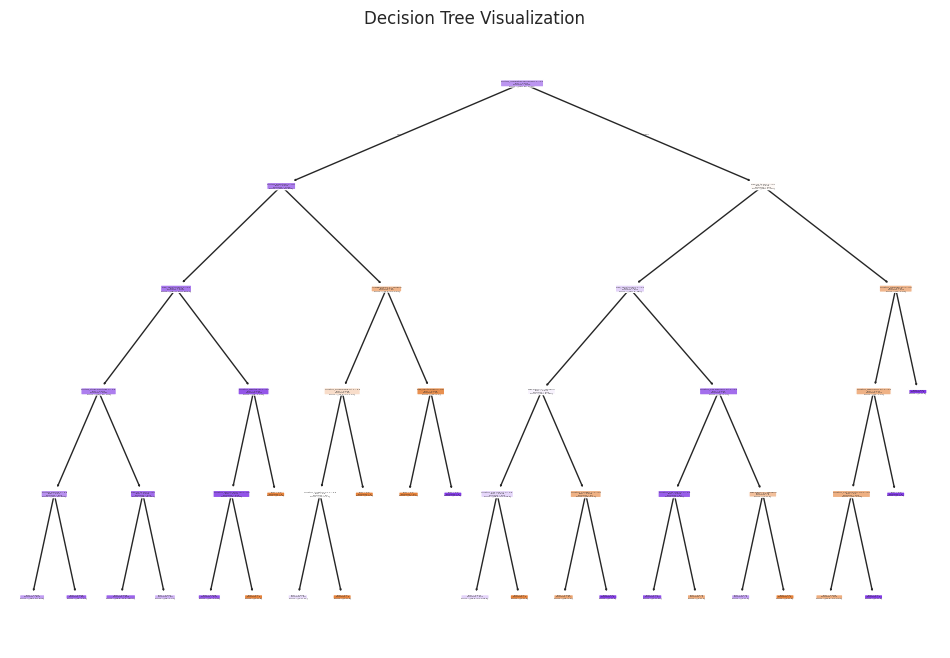

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.20      0.30       140
         Low       1.00      0.00      0.00        14
      Medium       0.69      0.93      0.79       297

    accuracy                           0.67       451
   macro avg       0.75      0.38      0.36       451
weighted avg       0.66      0.67      0.61       451



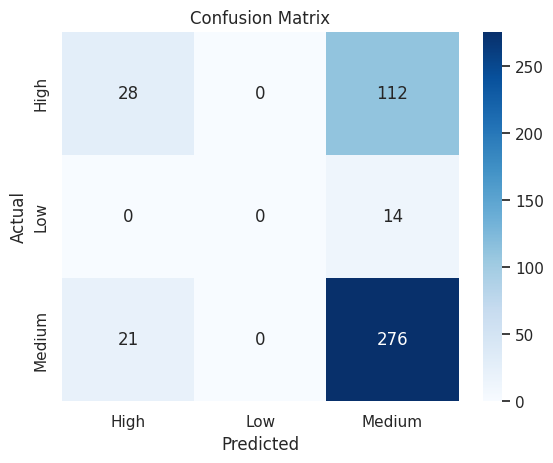

In [ ]:
y_pred = dt_classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

GridSearchCV to find the optimal hyperparameters

In [ ]:
#optimize

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Optimized Model: {accuracy:.2f}")


Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.71
Test Accuracy with Optimized Model: 0.68


### Model building - RandomForest



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.44      0.49       140
         Low       0.00      0.00      0.00        14
      Medium       0.73      0.84      0.78       297

    accuracy                           0.69       451
   macro avg       0.43      0.43      0.43       451
weighted avg       0.66      0.69      0.67       451



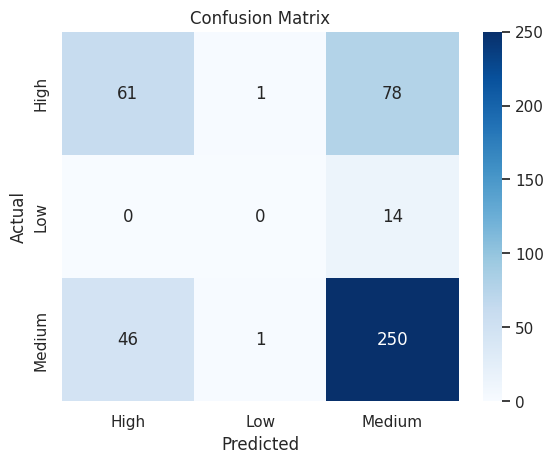

In [ ]:
# Using other model "RandomForest" to get better results

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


GridSearchCV to find the optimal hyperparameters

In [ ]:
#Hyperparameter Tuning for Random Forest

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              verbose=2,
                              n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_rf:.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


Feature Importance graph for a Random Forest model represents the contribution of each feature in the dataset to the predictions made by the model.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


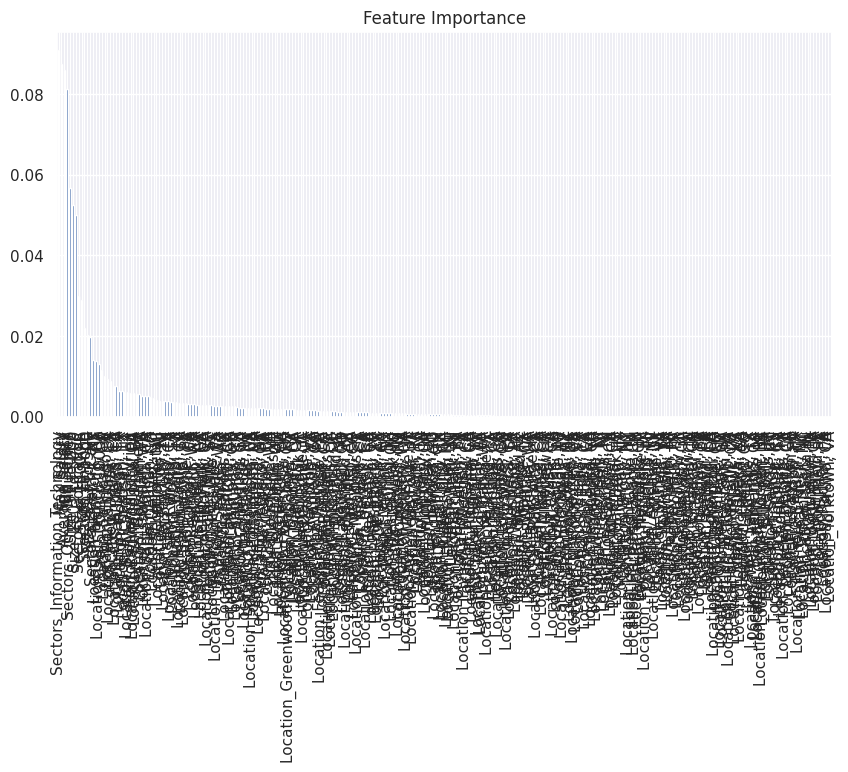

In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Feature Importance')
plt.show()

### Model Performance Overview

**Decision Tree** Classifier:

Accuracy: 67%
The performance of the model is moderate, with an overall accuracy of 67%. However, the classification for specific categories like "High" and "Low" ratings is weak.
The f1-score for "High" (0.30) and "Low" (0.00) indicates poor precision and recall for these categories. The model struggles with these less frequent classes, likely due to class imbalance.
"Medium" ratings are predicted much more reliably with a high f1-score of 0.79.

**Random Forest** Classifier:

Accuracy: 69%
The Random Forest model outperforms the Decision Tree slightly, with an accuracy of 69%.
It shows an improvement in the "High" category (f1-score: 0.49) compared to the Decision Tree, but still struggles with the "Low" category, which has an f1-score of 0.00.
The "Medium" category continues to have the highest performance, with an f1-score of 0.78.

## Unsupervised Learning



1.   K-Means
2.   APRIORI





### Model building - K-Means


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


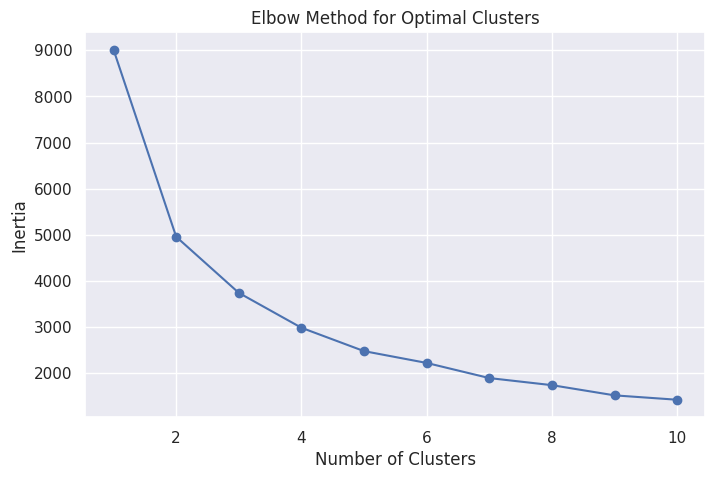

           Rating    Min Salary     Max Salary  Average Salary
Cluster                                                       
0        3.800572  89120.786517  138592.696629   113856.741573
1        3.675583  37259.259259   63980.884110    50620.071685
2        3.753312  55986.792453   94178.301887    75083.018868


In [ ]:
# Select numerical features
numerical_features = ['Rating', 'Min Salary', 'Max Salary', 'Average Salary']
df_kmeans = df[numerical_features].dropna()

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_kmeans)

# Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-Means with optimal k (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_kmeans['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze clusters
print(df_kmeans.groupby('Cluster').mean())

### Model building - APRIORI


In [ ]:
# Select categorical features for transactions
categorical_features = ['Job Title', 'Location', 'Sectors', 'Industries']
df_apriori = df[categorical_features].dropna()

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df_apriori, prefix=categorical_features, drop_first=True)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
# Added num_itemsets parameter
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets.shape[0])

# Sort rules by confidence
rules = rules.sort_values(by='confidence', ascending=False)

# Display the top 10 rules
print(rules.head(10))

                                          antecedents  \
4                               (Sectors_Health Care)   
5       (Industries_Health Care Services & Hospitals)   
7                            (Industries_IT Services)   
9                          (Sectors_Other Industries)   
10  (Sectors_Other Industries, Job Title_Data Anal...   
12  (Industries_Other Industries, Job Title_Data A...   
8                       (Industries_Other Industries)   
6                    (Sectors_Information Technology)   
3                            (Job Title_Data Analyst)   
14                           (Job Title_Data Analyst)   

                                          consequents  antecedent support  \
4       (Industries_Health Care Services & Hospitals)            0.067022   
5                               (Sectors_Health Care)            0.067022   
7                    (Sectors_Information Technology)            0.144252   
9                       (Industries_Other Industries)           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Model Conclusions

#### K-Means


*   **Cluster 0**: Higher salaries and a slightly higher rating.
*   **Cluster 1**: Lower salaries and a somewhat lower rating.
*   **Cluster 2**: Mid-range salaries and a rating in between the other two clusters.



### Apriori
What the output might contain:

The output would be a table or DataFrame containing information about the top 10 association rules, including:


*   **antecedents**: The items or conditions that precede the consequent.
*   **consequents**: The items or conditions that are predicted to occur if the antecedent is true.
*   **support**: The proportion of transactions that contain both the antecedent and consequent.
*   **confidence**: The probability that the consequent will occur given that the antecedent has occurred.
*   **confidence**: The probability that the consequent will occur given that the antecedent has occurred.
*   **lift**: A measure of how much more likely the consequent is to occur when the antecedent is present, compared to how likely it is to occur independently.



The rules with **confidence = 1.0** and lift significantly greater than 1 are the **strongest** ones, showing that whenever the antecedent occurs, the consequent always occurs (in this dataset), and well above what would be expected by chance.

In our dataset, the most striking rules are:


*   Sectors_Health Care <-> Industries_Health Care Services & Hospitals
*   Industries_IT Services -> Sectors_Information Technology
*   Sectors_Other Industries <-> Industries_Other Industries


These results indicate that whenever a row is labeled “Health Care” in the Sectors column, it is also always labeled “Health Care Services & Hospitals” in the Industries column, and so forth. It is likely that “Sector” and “Industry” can be nearly synonymous or redundant in many cases (for example, “IT Services” in the Industries column vs. “Information Technology” in the Sectors column).

Regarding the rule involving **Job Title_Data Analyst** and **Sectors_Other Industries**, it has a moderate/low confidence (about 30%) and a lift near 1, suggesting this is not a particularly strong association.

**Key Takeaways:**



*   **High-confidence (1.0) and high-lift (>1) rules** indicate very strong associations.

*  ** High confidence but lift close to 1** may simply reflect a common pattern that is not surprising statistically.

*   **Moderate or lower confidence** and lift near 1 imply the relationship is not very strong and may occur around what would be expected by chance.
